In [1]:
import pandas as pd
import numpy as np

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
!dir

 Volume in drive D is Data
 Volume Serial Number is 38F8-14D4

 Directory of D:\YandexDisk\WorkSpace\Jupyter\SHAD_notebooks\_MachineLearning\Comp1 - Dota

22.02.2017  19:16    <DIR>          .
22.02.2017  19:16    <DIR>          ..
22.02.2017  13:56           291ÿ597 baseline.csv
22.02.2017  14:00            29ÿ609 baseline.ipynb
22.02.2017  13:49    <DIR>          data
18.02.2017  23:54         1ÿ227ÿ073 events.csv
22.02.2017  19:16           114ÿ215 FirstAttempt.ipynb
21.02.2017  15:31        28ÿ551ÿ532 gold.csv
18.02.2017  23:54         1ÿ783ÿ481 heroes.csv
19.02.2017  00:07        79ÿ452ÿ763 items.csv
21.02.2017  15:31        17ÿ204ÿ110 lh.csv
22.02.2017  13:37           144ÿ199 test.csv
22.02.2017  13:37           194ÿ347 train.csv
21.02.2017  15:31        27ÿ738ÿ483 xp.csv
              11 File(s)    156ÿ731ÿ409 bytes
               3 Dir(s)  56ÿ643ÿ977ÿ216 bytes free


In [6]:
train_matches = pd.read_csv('train.csv')
# data = pd.DataFrame(train_matches)
test_matches = pd.read_csv('test.csv')
# data.head()

In [7]:
train_matches[train_matches.mid == 9348]

,mid,radiant_won
4586,9348,0


In [3]:
events = pd.read_csv('events.csv')
events.head()

,mid,event_type,from_team,time
0,0,3,radiant,1
1,1,3,radiant,222
2,2,3,dire,143
3,3,3,radiant,143
4,4,3,dire,53


Данный файл содержит информацию о событиях, которые произошли в каждом матче.

Каждая строчка файла содержит следующие колонки:

mid — идентификатор матча

event_type — тип события

0 — Командой был забран Aegis

1 — Командой был украден Aegis

2 — Командой были разрушены бараки соперника

3 — Командой был сделано первое убийство героя соперника

4 — Командой был убит Roshan.

5 — Командой была разрушена своя башня

6 — Командой была разрушена башня соперника

from_team — название команды, которое инициировало событие

time — время в секундах от старта игры когда событие произошло

radiant_won = 0, когда команда радиант проиграла (не выиграла)

Грубо говоря - 0 - команда радиант

destroy_baracks = 0 - команда radiant сломала бараки

killen_roshan = 0 - команда radiant убила рошана

### Event 4 - Killen Roshan

In [7]:
# events.loc[(events['event_type'] == 4) & (events.from_team == 'dire'), 'killen_roshan'] = 1
# events.loc[(events['event_type'] == 4) & (events.from_team == 'radiant'), 'killen_roshan'] = 0
# events.killen_roshan.fillna(0.5, inplace=True)

In [24]:
dire_roshan = set(events.loc[(events['event_type'] == 4) & (events.from_team == 'dire')].mid.values)
for mid in data.mid: 
    if mid in dire_roshan:
        data.loc[data.mid == mid, 'killen_roshan'] = 1
        
radiant_roshan = set(events.loc[(events['event_type'] == 4) & (events.from_team == 'radiant')].mid.values)
for mid in data.mid: 
    if mid in radiant_roshan:
        data.loc[data.mid == mid, 'killen_roshan'] = 0
        
data.killen_roshan.fillna(0.5, inplace=True)
data.head()

,mid,radiant_won,killen_roshan,destroy_barack,radiant_kill_own_tower,dire_kill_own_tower,dire_destroy_tower,radiant_destroy_tower,fb
0,0,1,0.0,0.5,0,0,0,0,0.0
1,1,0,0.0,0.5,0,0,0,0,0.0
2,2,1,1.0,0.5,0,0,0,0,1.0
3,4,1,1.0,0.5,0,0,0,0,1.0
4,5,1,0.5,0.5,0,0,0,0,NaN


In [7]:
data.loc[(data.killen_roshan == 1) | (data.killen_roshan == 0)].shape[0]

481

In [8]:
# events.loc[(events['event_type'] == 2) & (events.from_team == 'dire'), 'destroy_baracks'] = 1
# events.loc[(events['event_type'] == 2) & (events.from_team == 'radiant'), 'destroy_baracks'] = 0
# events.destroy_baracks.fillna(0.5, inplace=True)
# events.loc[events['event_type'] == 2]

### Event 2 - destroyed baracks

In [9]:
dire_destroy_barack = set(events.loc[(events['event_type'] == 2) & (events.from_team == 'dire')].mid.values)
for mid in data.mid: 
    if mid in dire_destroy_barack:
        data.loc[data.mid == mid, 'destroy_barack'] = 1
        
radiant_destroy_barack = set(events.loc[(events['event_type'] == 2) & (events.from_team == 'radiant')].mid.values)
for mid in data.mid: 
    if mid in radiant_destroy_barack:
        data.loc[data.mid == mid, 'destroy_barack'] = 0
        if mid in dire_destroy_barack:
            data.loc[data.mid == mid, 'destroy_barack'] = 0.5
        
data.destroy_barack.fillna(0.5, inplace=True)
data.head()

,mid,radiant_won,killen_roshan,destroy_barack
0,0,1,0.5,0.5
1,1,0,0.5,0.5
2,2,1,0.5,0.5
3,4,1,0.5,0.5
4,5,1,0.5,0.5


In [10]:
data.loc[data.destroy_barack != 0.5]

,mid,radiant_won,killen_roshan,destroy_barack
4586,9348,0,0.5,1.0
7116,14337,1,0.5,0.0
18360,36614,0,0.5,1.0
20355,40699,1,0.5,0.0
23691,47375,0,0.5,1.0


### Event 5 - Killen own Tower

In [19]:
# events.loc[(events['event_type'] == 5) & (events.from_team == 'dire'), 'killen_own_tower'] = 1
# events.loc[(events['event_type'] == 5) & (events.from_team == 'radiant'), 'killen_own_tower'] = 0
# events.killen_own_tower.fillna(0.5, inplace=True)
# events.loc[events['event_type'] == 5].head()

In [11]:
data['radiant_kill_own_tower'] = 0
data['dire_kill_own_tower'] = 0
data.head()

,mid,radiant_won,killen_roshan,destroy_barack,radiant_kill_own_tower,dire_kill_own_tower
0,0,1,0.5,0.5,0,0
1,1,0,0.5,0.5,0,0
2,2,1,0.5,0.5,0,0
3,4,1,0.5,0.5,0,0
4,5,1,0.5,0.5,0,0


In [12]:
from collections import Counter
c = Counter(events.loc[(events['event_type'] == 5) & (events.from_team == 'dire')].mid.values)
print c.most_common()[:5]
print len(c)

[(48830, 2), (389, 2), (16845, 2), (25165, 2), (4709, 2)]
1162


In [13]:
dire_kill_own_tower = events.loc[(events['event_type'] == 5) & (events.from_team == 'dire')].mid.values
for mid in data.mid: 
    if mid in dire_kill_own_tower:
        data.loc[data.mid == mid, 'dire_kill_own_tower'] = 1
        
radiant_kill_own_tower = events.loc[(events['event_type'] == 5) & (events.from_team == 'radiant')].mid.values
for mid in data.mid: 
    if mid in radiant_kill_own_tower:
        data.loc[data.mid == mid, 'radiant_kill_own_tower'] = 1

data.head()

,mid,radiant_won,killen_roshan,destroy_barack,radiant_kill_own_tower,dire_kill_own_tower
0,0,1,0.5,0.5,0,0
1,1,0,0.5,0.5,0,0
2,2,1,0.5,0.5,0,0
3,4,1,0.5,0.5,0,0
4,5,1,0.5,0.5,0,0


In [14]:
data.sum()

mid                       622912982.0
radiant_won                   12974.0
killen_roshan                 12518.5
destroy_barack                12487.5
radiant_kill_own_tower          539.0
dire_kill_own_tower             588.0
dtype: float64

### Event 5 - Killen own Tower

In [18]:
data['dire_destroy_tower'] = 0
data['radiant_destroy_tower'] = 0

dire_destroy_tower = events.loc[(events['event_type'] == 6) & (events.from_team == 'dire')].mid.values
for mid in data.mid: 
    if mid in dire_destroy_tower:
        data.loc[data.mid == mid, 'dire_destroy_tower'] = 1
        
radiant_destroy_tower = events.loc[(events['event_type'] == 6) & (events.from_team == 'radiant')].mid.values
for mid in data.mid: 
    if mid in radiant_destroy_tower:
        data.loc[data.mid == mid, 'radiant_destroy_tower'] = 1

data.head()

,mid,radiant_won,killen_roshan,destroy_barack,radiant_kill_own_tower,dire_kill_own_tower,dire_destroy_tower,radiant_destroy_tower
0,0,1,0.5,0.5,0,0,0,0
1,1,0,0.5,0.5,0,0,0,0
2,2,1,0.5,0.5,0,0,0,0
3,4,1,0.5,0.5,0,0,0,0
4,5,1,0.5,0.5,0,0,0,0


In [20]:
Counter(dire_destroy_tower).most_common()[:5]

[(9512, 7), (7341, 6), (41811, 6), (29462, 6), (34686, 5)]

In [19]:
data.sum()

mid                       622912982.0
radiant_won                   12974.0
killen_roshan                 12518.5
destroy_barack                12487.5
radiant_kill_own_tower          539.0
dire_kill_own_tower             588.0
dire_destroy_tower             3309.0
radiant_destroy_tower          3897.0
dtype: float64

### FB event3

In [25]:
dire_fb = set(events.loc[(events['event_type'] == 3) & (events.from_team == 'dire')].mid.values)
for mid in data.mid: 
    if mid in dire_fb:
        data.loc[data.mid == mid, 'made_fb'] = 1
        
radiant_fb = set(events.loc[(events['event_type'] == 3) & (events.from_team == 'radiant')].mid.values)
for mid in data.mid: 
    if mid in radiant_fb:
        data.loc[data.mid == mid, 'made_fb'] = 0
        
data.made_fb.fillna(0.5, inplace=True)
data.head()

,mid,radiant_won,killen_roshan,destroy_barack,radiant_kill_own_tower,dire_kill_own_tower,dire_destroy_tower,radiant_destroy_tower,fb,made_fb
0,0,1,0.0,0.5,0,0,0,0,0.0,0.0
1,1,0,0.0,0.5,0,0,0,0,0.0,0.0
2,2,1,1.0,0.5,0,0,0,0,1.0,1.0
3,4,1,1.0,0.5,0,0,0,0,1.0,1.0
4,5,1,0.5,0.5,0,0,0,0,NaN,0.5


In [21]:
# events.loc[(events['event_type'] == 3) & (events.from_team == 'dire'), 'make_fb'] = 1
# events.loc[(events['event_type'] == 3) & (events.from_team == 'radiant'), 'make_fb'] = 0
# events.make_fb.fillna(0.5, inplace=True)
# events.loc[events['event_type'] == 3].head()

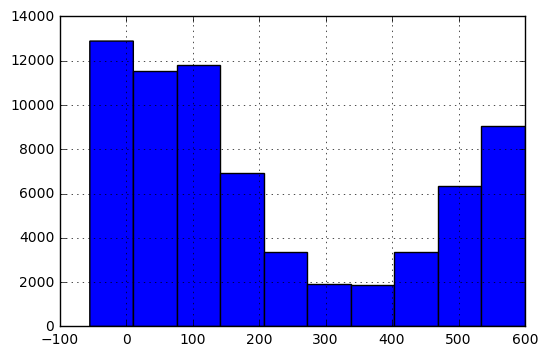

In [11]:
events.time.hist()

In [13]:
heroes = pd.read_csv('heroes.csv')
heroes.head()

,mid,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,91,42,87,15,65,11,6,34,69,74
1,1,69,85,71,24,64,74,68,39,65,11
2,2,17,40,31,67,99,32,7,72,48,104
3,3,80,43,101,71,94,69,70,98,24,39
4,4,25,15,75,29,95,3,32,55,64,86


Идеи:

- поискать героев, что нанесли больше всего урона, убили больше всего игроков, крипов, заработали больше всего золота. Они подозрительны на керри. Если в команде либо нет, либо слишком много керри - она проиграет.
- посмотреть как много золота заработал(сделал убийств героев, крипов / нанес урона) данный герой относительно среднего значения по данному герою

In [17]:
items = pd.read_csv('items.csv')
items.head(10)

,mid,player,item_0,item_1,item_2,item_3,item_4,item_5,item_6,item_7,...,item_111,item_112,item_113,item_114,item_115,item_116,item_117,item_118,item_119,item_120
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
5,0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
6,0,6,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
7,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Использовать тяжело. Категориальный признак

In [27]:
gold = pd.read_csv('gold.csv')
gold.head(10)

,mid,times,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,60,750,350,389,437,428,398,344,654,287,1056
1,0,120,957,1071,633,655,1080,669,1147,1164,438,1360
2,0,180,1161,1527,782,1103,1346,1058,1479,1574,587,2072
3,0,240,1571,2033,932,1515,2058,1760,1767,2387,737,2283
4,0,300,1721,2313,1082,1790,2699,2087,1986,2898,887,3302
5,0,360,1871,2753,1232,2126,3645,2417,2382,3416,1037,4071
6,0,420,2022,3216,1382,2703,4176,2567,2778,4115,1187,4686
7,0,480,2850,3941,2129,3249,5040,2717,3326,4931,1424,5207
8,0,540,3303,4686,2402,3716,5546,3428,3596,5580,1574,5609
9,0,600,3454,5206,2613,4426,5755,4072,3997,5917,1725,6384


In [29]:
last_gold = gold[gold.times == 600]

radiant_gold = last_gold[['player_0', 'player_1', 'player_2', 'player_3', 'player_4']].sum(axis=1)
dire_gold = last_gold[['player_5', 'player_6', 'player_7', 'player_8', 'player_9']].sum(axis=1)

last_gold['radiant_gold'] = radiant_gold
last_gold['dire_gold'] = dire_gold

last_gold.head()

C:\Anaconda3\envs\Python2.7\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\envs\Python2.7\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,mid,times,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9,radiant_gold,dire_gold
9,0,600,3454,5206,2613,4426,5755,4072,3997,5917,1725,6384,21454,22095
19,1,600,2477,5760,3816,4353,5759,7659,5066,2748,4440,4623,22165,24536
29,2,600,3604,1948,8581,4390,2869,3096,2301,5130,2530,2491,21392,15548
39,3,600,3457,5464,4432,2961,4314,3345,4791,1906,5328,2247,20628,17617
49,4,600,3675,4103,5154,3030,2076,3920,3494,3392,4458,2220,18038,17484


In [31]:
last_gold['diff_gold'] = last_gold['radiant_gold'] - last_gold['dire_gold']
last_gold['ratio_gold'] = last_gold['radiant_gold'] / last_gold['dire_gold']
last_gold.head()

C:\Anaconda3\envs\Python2.7\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda3\envs\Python2.7\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,mid,times,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9,radiant_gold,dire_gold,diff_gold,ratio_gold
9,0,600,3454,5206,2613,4426,5755,4072,3997,5917,1725,6384,21454,22095,-641,0.970989
19,1,600,2477,5760,3816,4353,5759,7659,5066,2748,4440,4623,22165,24536,-2371,0.903366
29,2,600,3604,1948,8581,4390,2869,3096,2301,5130,2530,2491,21392,15548,5844,1.375868
39,3,600,3457,5464,4432,2961,4314,3345,4791,1906,5328,2247,20628,17617,3011,1.170914
49,4,600,3675,4103,5154,3030,2076,3920,3494,3392,4458,2220,18038,17484,554,1.031686


In [ ]:
train = pd.merge(train_matches[['mid']], gold, on='mid', how='left').drop(['mid', 'times'], 1)
test = pd.merge(test_matches[['mid']], gold, on='mid', how='left').drop(['mid', 'times'], 1)

In [22]:
lh = pd.read_csv('lh.csv')
lh.head()

,mid,times,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,60,1,2,1,1,2,3,2,7,1,2
1,0,120,1,5,1,2,6,5,6,14,1,6
2,0,180,2,10,1,7,8,9,9,18,1,9
3,0,240,2,13,1,13,12,9,12,29,1,10
4,0,300,2,15,1,17,19,13,13,36,1,19


Данный файл содержит снимки данных, содержащих количество убитых нейтральных монстров (крипов) для каждого игрока.

Каждая строчка файла содержит следующие колонки:

mid — идентификатор матча

times — время в секундах когда был сделан снимок

player_0, player_1, player_2, player_3, player_4 — количество убитых монстров для игроков команды radiant

player_5, player_6, player_7, player_8, player_9 — количество убитых монстров для игроков команды dire

In [23]:
xp = pd.read_csv('xp.csv')
xp.head(20)

,mid,times,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,60,79,214,147,222,147,94,78,396,94,147
1,0,120,321,719,423,777,421,490,607,895,241,365
2,0,180,356,1333,424,1300,638,922,937,1259,242,590
3,0,240,544,1752,441,1782,1348,1460,1163,2037,242,658
4,0,300,724,2002,565,2087,1807,2102,1498,2389,276,1020
5,0,360,758,2421,598,2426,2433,2464,1996,2819,275,1382
6,0,420,865,2852,632,2823,2841,2464,2246,3432,275,1471
7,0,480,1259,3479,1269,3488,3361,2633,2843,4097,341,1699
8,0,540,1542,3803,1446,3747,3707,3205,3273,4595,340,1876
9,0,600,1696,4304,1606,4429,3821,3745,3635,4846,357,2347
